In [4]:
import pandas as pd
data = pd.read_csv('test.csv')
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [2]:
(data.isna().sum()/data.shape[0]).apply(lambda x: format(x, '.2%'))

NameError: name 'data' is not defined

In [50]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True, axis=1)

In [52]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.8+ KB


In [54]:
data = data.dropna(axis=0)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [56]:
data['Sex'] = (data['Sex'] == 'male').astype('int')

In [57]:
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [58]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [61]:
X = data.iloc[:, data.columns != "Survived"]
y = data.iloc[:, data.columns == "Survived"]

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)
#test_size是测试集占总数据集的比例

In [65]:
#1.声明分类树模型
clf = DecisionTreeClassifier()
#2.传入训练集训练模型
clf = clf.fit(Xtrain, Ytrain)
#3.传入测试集评价模型
score_ = clf.score(Xtest, Ytest)
score = cross_val_score(clf,X,y,cv=10).mean() #交叉验证集准确度

print('测试集准确度:{}\n交叉验证集准确度:{}'.format(score_,score))

测试集准确度:0.8202247191011236
交叉验证集准确度:0.7784218590398366


entropy:0.8177860061287026,gini0.8177987742594486


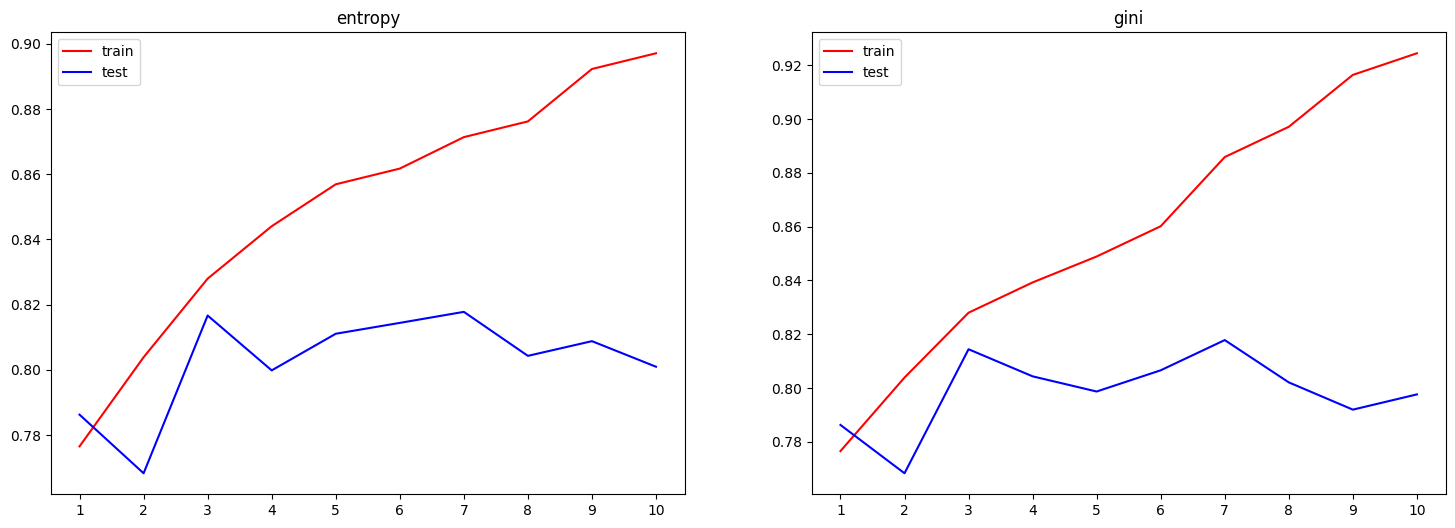

In [71]:
import matplotlib.pyplot as plt

tr_entropy = []
te_entropy = []

tr_gini = []
te_gini = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1,
                                criterion='entropy'
                                )
    clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr_entropy.append(score_tr)
    te_entropy.append(score_te)
    
    clf = DecisionTreeClassifier(random_state=25,
                                 max_depth=i+1,
                                 criterion='gini'
                                )
    clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr_gini.append(score_tr)
    te_gini.append(score_te)
    
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 6))

ax0.plot(range(1,11),tr_entropy,color='r', label='train')
ax0.plot(range(1,11),te_entropy,color='blue', label='test')
ax0.set_xticks(range(1,11))
ax0.set_title('entropy')
ax0.legend()

ax1.plot(range(1,11),tr_gini,color='r', label='train')
ax1.plot(range(1,11),te_gini,color='blue', label='test')
ax1.set_xticks(range(1,11))
ax1.set_title('gini')
ax1.legend()
    
print('entropy:{},gini{}'.format(max(te_entropy),max(te_gini)))


In [77]:
import numpy as np
from sklearn.model_selection import GridSearchCV

gini_thresholds = np.linspace(0, 0.5, 20)
parameters = {'criterion': ('gini', 'entropy'),
              'splitter':('best', 'random'),
              'max_depth':[*range(2,5)],
              'min_samples_leaf':[*range(1,10,2)]
             }
              
clf = DecisionTreeClassifier(random_state=25)
gs = GridSearchCV(clf, parameters,cv=10)
gs.fit(Xtrain,Ytrain) 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'splitter': ('best', 'random')})

In [78]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 7,
 'splitter': 'best'}

In [79]:
clf = DecisionTreeClassifier(random_state=20,
                             criterion='gini',
                             max_depth=4,
                             min_samples_leaf=7,
                             splitter='random'
                            )
clf = clf.fit(Xtrain, Ytrain)
cross_val_score(clf,X,y,cv=10).mean()

0.8166751787538304

In [80]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [82]:
def clean_data(data):
    data = data.drop(['Cabin','Name','Ticket','PassengerId'],
                    axis=1,
                    )
    data['Age'] = data['Age'].fillna(data['Age']).mean()
    data['Fare'] = data['Fare'].fillna(data['Fare']).mean()
    data = data.dropna(axis=0)
    data['Sex'] = (data['Sex'] == 'male').astype('int')
    data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
    return data

In [89]:
test_data = clean_data(test)
res = pd.concat([test['PassengerId'],pd.DataFrame(clf.predict(test_data))], axis=1)
res.columns = ['PassengerId', 'Survived']
res.to_csv("result.csv",sep=',',index=False)

In [91]:
clf.fit(Xtest, Ytest)
cross_val_score(clf,X,y,cv=10).mean()

clf.fit(Xtest.

0.8166751787538304